<a href="https://colab.research.google.com/github/AhmetSarici/DataScience/blob/ML/SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SVR (Destek Vektör Regresyonu)

Bir marjin aralığına maksimum noktayı en küçük hata ile alabilecek şekilde doğru ya da eğriyi belirlemektir.

Robast Regresyon : Aykırılıklara daha az duyarlı algoritma

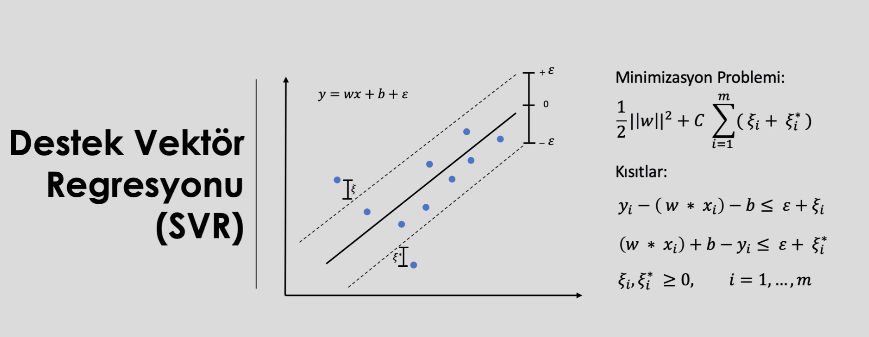

Doğrusal SVR

In [ ]:
hit = pd.read_csv("Hitters.csv")
df = hit.copy()
df = df.dropna()
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X_ = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1).astype('float64')
X = pd.concat([X_, dms[['League_N', 'Division_W', 'NewLeague_N']]], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.25, 
                                                    random_state=42)

In [ ]:
X_train = pd.DataFrame(X_train["Hits"])
X_test = pd.DataFrame(X_test["Hits"])

In [ ]:
from sklearn.svm import SVR

In [ ]:
#SVR Model
#svr_model = SVR("linear").fit(X_train, y_train) hata veriyor
svr_model = SVR(kernel="linear").fit(X_train, y_train)

In [ ]:
svr_model.predict(X_train)[0:5] #bağımlı değişkenlerin tahmin değeri

array([403.52804878, 666.91219512, 706.66829268, 194.80853659,
       423.40609756])

In [ ]:
#Model denklemi
print ("y = {0} + {1} x".format(svr_model.intercept_[0], #sabit
                                svr_model.coef_[0][0])) #b1 katsayısı

y = -48.69756097561513 + 4.969512195122093 x


In [ ]:
X_train["Hits"][0:1]

183    91.0
Name: Hits, dtype: float64

In [ ]:
#Atılan basket sayısına göre alacağı maaş
-48.69756097561513 + 4.969512195122093*91

403.5280487804953

In [ ]:
y_pred = svr_model.predict(X_train)

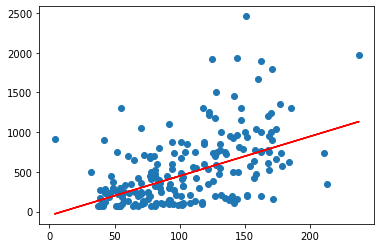

In [ ]:
plt.scatter(X_train, y_train)
plt.plot(X_train,y_pred, color = "r");

In [ ]:
#Doğrusal regresyon ile hesaplama
from sklearn.linear_model import LinearRegression
lm_model = LinearRegression().fit(X_train, y_train)
lm_pred  = lm_model.predict(X_train)
print("y = {0} + {1} x".format(lm_model.intercept_, lm_model.coef_[0]))

y = -8.814095480334345 + 5.172456135470686 x


In [ ]:
-8.814095480334572 + 5.1724561354706875*91

461.879412847498

Text(0, 0.5, 'Maaş (Salary)')

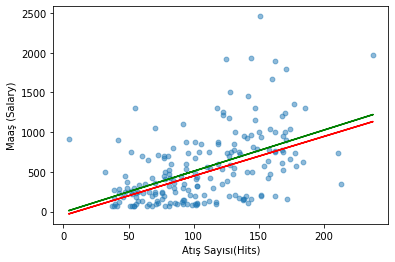

In [ ]:
#İki modelin karşılaştırılmak istenirse
plt.scatter(X_train, y_train, alpha=0.5, s=23)
plt.plot(X_train, lm_pred, 'g')
plt.plot(X_train, y_pred, color='r')

plt.xlabel("Atış Sayısı(Hits)")
plt.ylabel("Maaş (Salary)")

Lineer model aykırı gözlemlerin etkisi yüksektir
SVR da ise bu etki daha azdır, farklı sonuçlar vermesinin nedeni içerisindedir.

## Tahmin

In [ ]:
print ("y = {0} + {1} x".format(svr_model.intercept_[0], svr_model.coef_[0][0])) 

y = -48.69756097561513 + 4.969512195122093 x


In [ ]:
#91 adet basket atmış ise
svr_model.predict([[91]])

array([403.52804878])

In [ ]:
#Tahmin alalım
y_pred = svr_model.predict(X_test)

In [ ]:
#Testt hatası
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

In [ ]:
svr_model

SVR(kernel='linear')

## Model Tuning

In [ ]:
svr_model

SVR(kernel='linear')

In [ ]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv = 10).fit(X_train,y_train)

In [ ]:
pd.Series(svr_cv_model.best_params_)[0]

0.4

In [ ]:
svr_tuned = SVR(kernel="linear", 
                C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

In [ ]:
y_pred = svr_tuned.predict(X_test)

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

458.198966781116

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

367.538528365296